This session aims to show the potential of machine learning to analyse data without the need to derive features, which is often the most time consuming aspect of engineering data science. In this example, we are going to use a supervised learning approach with a Convolutional Neural Network to analyse time series acceleration data.

Supervised learning is the process of using mapped data inputs with output states to derive a function that links them. By using known mapped inputs to known outputs to supervise the training to create this function, it is then possible to present new inputs and predict outputs. In this approach, it is necessary that the data has been labelled accurately. For example, if we are wanting to analyse manufacturing data to optimise component quality using supervised learning, we would need to have a data that is associated with labels such as "pass" or "fail".

In machine learning for engineering data, our goal is to develop a model that will support decisions, whether a component passes and moves onto the next stage, whether remedial action is needed or whether the process needs to be improved.

First, let's get the Python tools we need. In this cell, we are importing functions from themed libraries so that we do not have to create these from scratch. First we are importing numpy or numerical python, a library with useful tools for handling numerical data such as matrix formatting. We are abbreviating this library to the letters 'np' so that when we call a function from the numpy library, we do not need to type in numpy, followed by the desired function each time and to improve code readabilty.

Next we are importing a library called PyTorch which based on the machine learning library and framework Torch. PyTorch contains functions to create Convolutional Neural Networks and other machine learning tools, as well as the necessary software interfaces to computer hardware like graphical processing units (GPU's) for enhanced analysis capabiltities.

We are then importing a particular sub-library of fast.ai, a popular deep learning framework.

Next we are importimg a specific toolkit from PyTorch (nn or neural nets) that we will be using often so it is useful to import this as a specific shortcut, in this case 'nn'.

Finally we are importing 2 specific functions from a library called scikit-learn or sklearn that we use to split our data into training and test sets. The second we will use to present the evaluation of the model accuracy is a coherent manner. The last library is matplotlib which we will use for some other plots.

In [2]:
import numpy as np
import torch
import torch.nn as nn
# import fastai.basics as fs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
# torch.cuda.current_device()

Now, let's load the dataset named 'collar-sample-data.npz' that we are wanting to analyse and which we have placed in a folder called 'data' within the same directory as this .ipynb file:

In [6]:
path = 'data/'
filename = 'collar-sample-data.npz'
npfile=np.load(path+filename)

OK let's visualise some of the data to understand what we are trying to analyse.

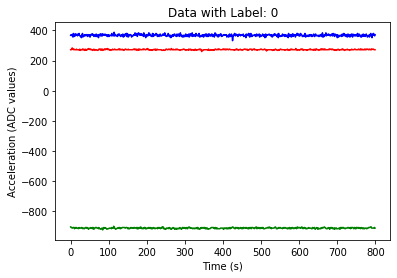

In [36]:
# load the raw data (in this case 3 axis acceleration data)
X=npfile['arr_0']

# load the labels for the raw data
Y=npfile['arr_1']

# now let's create a plot figure, add some axis and title labels and finally plot the 3 different acceleration values
ax1 = plt.subplot(111)
ax1.set_title("Data with Label: {}".format(Y[1]))
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Acceleration (ADC values)")
ax1.plot(X[1][0], color='red')
ax1.plot(X[1][1], color='green')
ax1.plot(X[1][2], color='blue');

What we have displayed above is an 800 s block of 3 axis acceleration data. Each of the axis acceleration values are shown in different colours. For this particular block of data, we have been provided a label of '0'. This means that all the data contained within this 800 s block is associated with one state. In reality, this data represents the acceleration of a sensor mounted to the collar of a dairy cow. The label '0' represents the behavioural state of low activity. In this dataset, we have 3 possible labelled states, 0, 1 and 2, corresponding to low activity, digesting food and eating. For the purpose of our model development, what the labels are and where the acceleration data comes from does not matter. The model will aim to derive a relationship between the data contained in a block to a given labelled state.

If we have poorly labelled data, which is often the case in engineering applications, the accuracy of our model will suffer as we will be providing the model with conflicting mapped inputs to outputs. Having well labelled data from domain experts is critical to developing an accurate model.

Abother key challenge is ensuring that your data is represenative of the expected range of inputs.  In our above example, we have over 1,500 pairs of 800s block of acceleration data with corresponding labelled states. If we train our model on these data pairs, but then introduce additional data that had a larger range of acceleration values, the model will not be able to make accurate predictions.

OK, now that we have an understanding of our data, we can begin to create our machine learning model.

In this case we are going to use a Convolutional Neural Network (or a CNN) that are commonly found in image-based analysis applications. In these image-based applications, a series of small images called 'kernels' are applied to the image using a matrix-multiplication operation (called a convolution) to generate an output image that indicates areas in which the kernel matched well or poorly. These kernels are be trying to find features within like edges within the image, specific objects or other patterns.

The image is passed through layers of these convolutions, with the output becoming simpler but more abstract. The goal of the machine learning process for CNN's is to derive the optimal combination of kernels that can be used to analyse the image in order to detect which feature we desire, perhaps people, cars or the position of machines in a factory floor.

However, CNN's don't just have applications for image data. Time series data typically consists of a signal with 1 or more varying values with respect to time. This may be temperature values from a thermocouple attached to a gearbox where we would get 1 temperature value and timstamp at a given sampling frequency. We could have multiple temperature sensors giving multiple values with a unified timestamp. In either case, it is possible to use a CNN with a different set of kernels to find features in 1 dimension rather than in 2 dimensions as is the case for images.

To create this model, first we need to define the architecture.  The process of creating a model is driven by the complexity of the data we are analysing and the decision we are ultimately trying to make. If we were analysing video data of a factory with dozens of staff moving around, varying light conditions and moving equipment with the goal of identifying efficient pathfinding, the model will be highly complex to reflect the application.

In our example, we are trying to analyse 3 axis acceleration data with respect to time, a simpler task so likely requiring a simpler model.

In [37]:
class Flatten(nn.Module):
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        return x

model = nn.Sequential(
    # Layer 1
    nn.Conv1d(in_channels=3, out_channels=64, kernel_size=4, stride=1),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    # Layer 2
    nn.Conv1d(in_channels=64, out_channels=64, kernel_size=8, stride=2),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    # Layer 3
    nn.Conv1d(in_channels=64, out_channels=64, kernel_size=16, stride=2),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    # Flatten
    Flatten(),
    # Neural Network
    nn.Linear(12160, 3),
    nn.Softmax(dim=1))

nchannels = 3
nfilters = 64
# number_of_points = 850

# define CNN model layers

class Flatten(nn.Module):
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        return x

model = nn.Sequential(
    # Layer 1
    nn.Conv1d(in_channels=nchannels, out_channels=nfilters, kernel_size=4, stride=1),
    nn.ReLU(),
    nn.BatchNorm1d(nfilters),
    # Layer 2
    nn.Conv1d(in_channels=nfilters, out_channels=nfilters, kernel_size=8, stride=2),
    nn.ReLU(),
    nn.BatchNorm1d(nfilters),
    # Layer 3
    nn.Conv1d(in_channels=nfilters, out_channels=nfilters, kernel_size=16, stride=2),
    nn.ReLU(),
    nn.BatchNorm1d(nfilters),
    # Flat
    Flatten(),
    nn.Linear(12160, 3),
    nn.Softmax(dim=1))

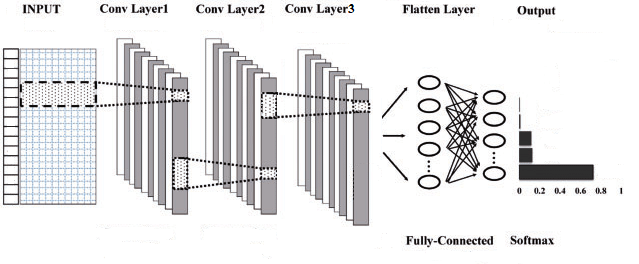

In our model, we have three 1-dimensional convolutional layers. The convolutional layers are creating higher degrees of abstraction that characterise the blocks of data based on patterns found within the original blocks and then within each subsequent layer. These are then used as the inputs for a fully connected neural network.

Developing an appropriate model can take a bit of time and experience, but understanding your data can help focus quickly into the most applicable tools.

As our data is time series with 3 different acceleration values for exery time increment, our convolutions only need to operate in 1 dimension, rather than in 2 like with images. As we have only 3 sources of data for each block (the x, y and z acceleration values), we only need 3 inputs into our model. We have are then setting a kernel size of 4. In our example, this will be equal to a 3x4 matrix sliding window as we are operating in 1 dimension. We are then setting a stride of 1, which means our window will move incrementally over the block of data, 1 column at a time. Finally, we are wanting to create 64 output channels from this layer to allow the convolution sufficient complexity to

Let's got through our training and test sets.

We split our available data into training and test sets, with a larger portion assigned for training, in our case, 66%. This data is provided to the model with the labelled states. The fully connected layer in our above CNN model consists of neurons with weights. When we train our model, we randomly assign weights to these neurons and allow our model to make a prediction. This is then compared to the actual state that data is meant to represent. Through a process callled back-propagation, the errors between the actual state and the predicted state are used to change these neurons weights. The model then makes another prediction, assesse the prediction to the actual labelled value and updates the weights again.

In [23]:
X=npfile['arr_0']
Y=npfile['arr_1']
Y=Y.squeeze()
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)
x_train,y_train,x_valid,y_valid = map(torch.tensor, (X_train,Y_train,X_valid,Y_valid))
# print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)
bs = 256
train_ds = fs.TensorDataset(x_train.float(), y_train)
valid_ds = fs.TensorDataset(x_valid.float(), y_valid)
data = fs.DataBunch.create(train_ds, valid_ds, bs=bs) #fastai function
average_type = 'macro'
learn = fs.Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=fs.FBeta(average=average_type, beta=1),callback_fns=fs.ShowGraph)
print(sum(p.numel() for p in model.parameters()))

torch.Size([3443, 3, 800]) torch.Size([3443]) torch.Size([1697, 3, 800]) torch.Size([1697])


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


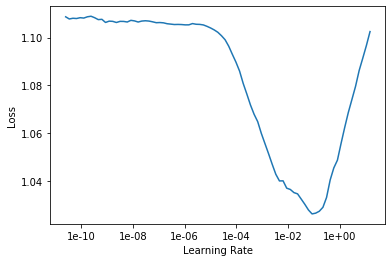

In [25]:
learn.lr_find(start_lr=1e-12, end_lr=100)
learn.recorder.plot()

epoch,train_loss,valid_loss,f_beta,time
0,1.103448,1.099458,0.233342,00:01
1,1.100476,1.095167,0.357338,00:01
2,1.097549,1.086848,0.394952,00:01
3,1.093616,1.077823,0.428235,00:01
4,1.088620,1.067512,0.467634,00:01
5,1.082641,1.056485,0.493387,00:01
6,1.074811,1.042679,0.525241,00:01
7,1.065305,1.025889,0.548990,00:01
8,1.053919,1.009091,0.562019,00:01
9,1.041541,0.992148,0.572402,00:01


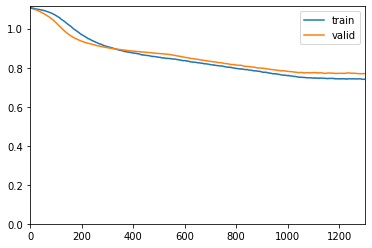

In [26]:
num_epochs = 100
learn.fit_one_cycle(num_epochs, max_lr=1e-5)

Text(0, 0.5, 'F1 score')

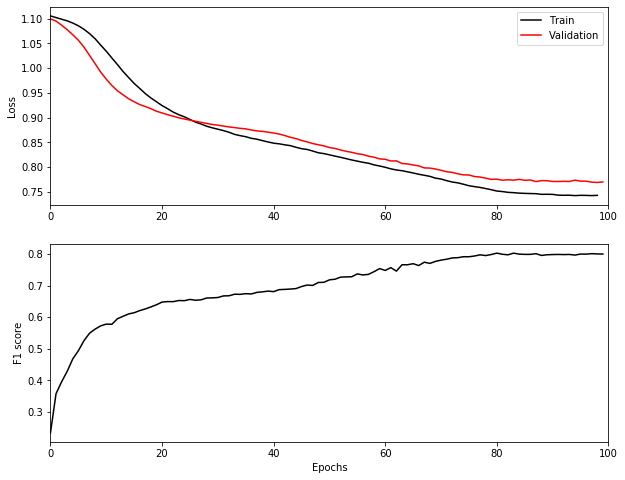

In [28]:
losses = learn.recorder.losses
val_losses = learn.recorder.val_losses
metrics = learn.recorder.metrics
nb_batches = learn.recorder.nb_batches

l = []
vec = np.arange(0,len(losses),nb_batches[0])
for i in range(len(vec)-1):
    l = l + [np.mean(losses[vec[i]:vec[i+1]])]

fs.plt.figure(figsize=(10,8))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

ax1.plot(l, color = 'k')
ax1.plot(val_losses, color = 'r')
ax1.set_xlim([0, num_epochs])
ax1.set_title('')
ax1.set_ylabel('Loss')
ax1.legend(['Train','Validation'])

ax2.plot(metrics, color = 'k')
ax2.set_xlim([0, num_epochs])
ax2.set_xlabel('Epochs')
ax2.set_ylabel('F1 score')

In [29]:
y_pred_prob,y_true= learn.get_preds()
y_pred = np.argmax(y_pred_prob.numpy(),axis=1)
classes_txt = ['Other', 'Rumination', 'Eating']
classes = np.take(classes_txt,[0,1,2])
confusion_matrix(y_true, y_pred)

array([[551,  59,  58],
       [ 54, 536,  97],
       [ 33,  21, 288]])

In [ ]:
# define CNN model hyper-parameters

nchannels = 3
nfilters = 64
number_of_points = 850

# define CNN model layers

class Flatten(nn.Module):
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        return x

model = nn.Sequential(
    # Layer 1
    nn.Conv1d(in_channels=nchannels, out_channels=nfilters, kernel_size=4, stride=1),
    nn.ReLU(),
    nn.BatchNorm1d(nfilters),
    # Layer 2
    nn.Conv1d(in_channels=nfilters, out_channels=nfilters, kernel_size=8, stride=2),
    nn.ReLU(),
    nn.BatchNorm1d(nfilters),
    # Layer 3
    nn.Conv1d(in_channels=nfilters, out_channels=nfilters, kernel_size=16, stride=2),
    nn.ReLU(),
    nn.BatchNorm1d(nfilters),
    # Flat
    Flatten(),
    nn.Linear(12160, 3),
    nn.Softmax(dim=1))